In [1]:
first_name= "Arman"
last_name= "Lotfalikhani"
student_number= "99109166"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part A

In [3]:
df=pd.read_csv('Heart_Disease_Dataset.csv')

In [4]:
print('Total size',df.size)
print('Rows', df.shape[0])
print('Columns', df.shape[1])

Total size 14280
Rows 1190
Columns 12


In [5]:
df2=df.dropna()
print(df2.shape)

(1190, 12)


In [6]:
g=df2.groupby(['target'],dropna=False)
counts=g.count()
c_t_0=counts['age'][0]
c_t_1=counts['age'][1]
print('Target value of zero: ',c_t_0)
print('Target value of zero: ',c_t_1)

Target value of zero:  561
Target value of zero:  629


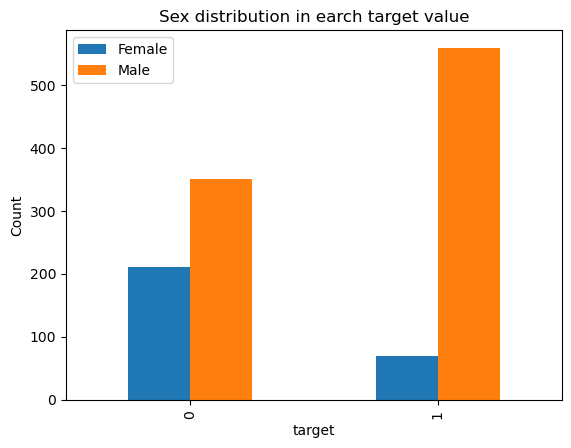

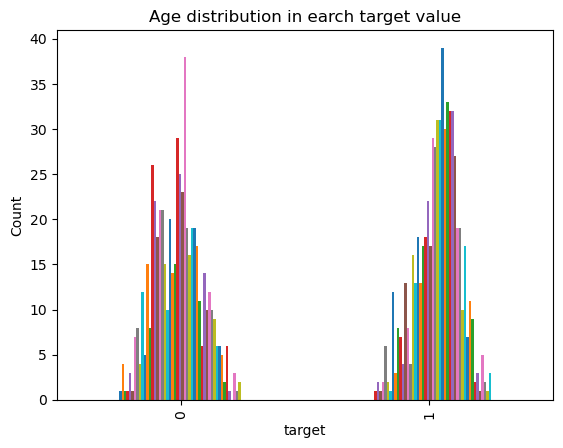

In [64]:
target_sex=df2.groupby(['target','sex'])
fig,ax=plt.subplots()
target_sex['target'].count().unstack().plot(kind='bar',ylabel='Count',ax=ax,title='Sex distribution in earch target value')
ax.legend(['Female','Male'])
plt.show()
target_age=df.groupby(['target','age'])
target_age['target'].count().unstack().plot(kind='bar',legend=False,ylabel='Count',title='Age distribution in earch target value')
plt.show()

Answers: The dataset size 1190 $\times$ 12. There is no omitted value in the dataset, as there is no NaN value. In the numeric columns, there are some zeros that are not near the average, and they will be dropped after performing the z-test. <br>
Also, there is a very slight imbalance, as the number of zeros (561) and ones (629) are rather close.

## Part B <br>

In [7]:
numeric_columns=['age','resting bp s','cholesterol','oldpeak','max heart rate']
indices_array=[]
df_new=df.copy()
for name in numeric_columns:
    series=df[name]
    std=series.std()
    mean=series.mean()
    a=(df[name]>mean+3*std)|(df[name]<mean-3*std)
    array=a[a==True].index.to_numpy()
    print(array)
    indices_array.append(array)
    df_new=df_new.drop(labels=array)
print(df_new.shape[0])

[]
[ 109  242  366  400  450  593  734  761 1013 1075]
[  30   76  149  618 1039]
[ 167  325  704  773  793  852  978 1010 1070 1078 1172]
[371 391]
1162


A z-test is performed for each numeric attribute independently, and the outliers are removed from the dataset. <br>
Their row numbers, as well as the final dataset size (1162) are shown above 

## Part C

In [8]:
for name in numeric_columns:
    dmin=df_new[name].min()
    dmax=df_new[name].max()
    df_new[name]=(df_new[name]-dmin)/(dmax-dmin)
df_new.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.333333,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.500000,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.333333,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.583333,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.333333,1,0


## Part D

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

In [11]:
train_df=df_new.sample(frac=0.7)
test_df=df_new.drop(train_df.index)

The above two lines split the dataset into test and train sets

### Linear Kernel

In [19]:
X_train=train_df.drop(columns=['target']).to_numpy()
X_test=test_df.drop(columns=['target']).to_numpy()
Y_train=train_df['target'].to_numpy()
Y_test=test_df['target'].to_numpy()

linear_classifiers=[]
accuracies=[]
C_s=[0.001,0.005,0.01,0.07,0.1,0.15,0.2,0.5,1]
for C in C_s:
    model1=SVC(kernel='linear',C=C)
    model1.fit(X_train,Y_train)
    linear_classifiers.append(model1)
    accuracies.append(model1.score(X_test,Y_test))
print(accuracies)
print("Best parameter is: ",C_s[np.argmax(accuracies)])
print('Accuracy is: ',np.max(accuracies))

[0.6762177650429799, 0.8252148997134671, 0.839541547277937, 0.8481375358166189, 0.8538681948424068, 0.8538681948424068, 0.8510028653295129, 0.8567335243553008, 0.8567335243553008]
Best parameter is:  0.5
Accuracy is:  0.8567335243553008


In [14]:
precision_recall_fscore_support(Y_test, linear_classifiers[np.argmax(accuracies)].predict(X_test), average='binary')

(0.8418367346938775, 0.8967391304347826, 0.8684210526315789, None)

The outputs are precision, recall and F1 score, respectively.

### Polynomial Kernel

In [15]:
poly_classifiers=[]
poly_accuracies=[]
C_s=[0.001,0.005,0.01,0.07,0.1,0.15,0.2,0.5,1,3,5,10]
degs=[3,4,5,6,7,8,9,10]
for C in C_s:
    for deg in degs:
        model1=SVC(kernel='poly',C=C,degree=deg)
        model1.fit(X_train,Y_train)
        poly_classifiers.append(model1)
        poly_accuracies.append(model1.score(X_test,Y_test))
print(poly_accuracies)

[0.7965616045845272, 0.8022922636103151, 0.8051575931232091, 0.8166189111747851, 0.8108882521489972, 0.8108882521489972, 0.8108882521489972, 0.8051575931232091, 0.8223495702005731, 0.8223495702005731, 0.830945558739255, 0.836676217765043, 0.8108882521489972, 0.8051575931232091, 0.8194842406876791, 0.828080229226361, 0.836676217765043, 0.830945558739255, 0.833810888252149, 0.833810888252149, 0.833810888252149, 0.8166189111747851, 0.830945558739255, 0.830945558739255, 0.8424068767908309, 0.8452722063037249, 0.8452722063037249, 0.8424068767908309, 0.8452722063037249, 0.8452722063037249, 0.839541547277937, 0.8481375358166189, 0.8481375358166189, 0.8452722063037249, 0.8424068767908309, 0.839541547277937, 0.8481375358166189, 0.8481375358166189, 0.8452722063037249, 0.8595988538681948, 0.8481375358166189, 0.8538681948424068, 0.839541547277937, 0.8452722063037249, 0.8510028653295129, 0.8510028653295129, 0.8510028653295129, 0.8624641833810889, 0.8452722063037249, 0.8510028653295129, 0.8481375358

In [18]:
poly_index=np.argmax(poly_accuracies)
print("Best parameters are: C= ",C_s[poly_index//len(C_s)],' , degree= ',degs[poly_index%len(degs)])
print('Accuracy is: ',poly_accuracies[poly_index])
precision_recall_fscore_support(Y_test, poly_classifiers[poly_index].predict(X_test), average='binary')

Best parameters are: C=  0.5  , degree=  8
Accuracy is:  0.8968481375358166


(0.9065934065934066, 0.8967391304347826, 0.9016393442622951, None)

The outputs are precision, recall and F1 score, respectively.

### RBF Kernel

In [21]:
rbf_classifiers=[]
rbf_accuracies=[]
C_s=[0.001,0.005,0.01,0.07,0.1,0.15,0.2,0.5,1,3,5,10]
gammas=[0.01,0.02,0.1,1,1,5,2,'auto']
for C in C_s:
    array=[]
    for gamma in gammas:
        model1=SVC(kernel='rbf',C=C,gamma=gamma)
        model1.fit(X_train,Y_train)
        rbf_classifiers.append(model1)
        rbf_accuracies.append(model1.score(X_test,Y_test))
        array.append(model1.score(X_test,Y_test))
print(rbf_accuracies)

[0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.5272206303724928, 0.7478510028653295, 0.5730659025787965, 0.5730659025787965, 0.5272206303724928, 0.5272206303724928, 0.7249283667621776, 0.7822349570200573, 0.8166189111747851, 0.839541547277937, 0.8624641833810889, 0.8624641833810889, 0.673352435530086, 0.8080229226361032, 0.8424068767908309, 0.8051575931232091, 0.8223495702005731, 0.8452722063037249, 0.8624641833810889, 0.8624641833810889, 0.7191977077363897, 0.8252148997134671, 0.8424068767908309, 0.8166189111747851, 0.830945558739255, 0.8510028653295129, 0.8653295128939829, 0.8653295128939829, 0.7707736389684814, 0.8567335243553008, 0.8510028653295129, 0.8223495702005731, 0.8424068767908309, 0.

In [22]:
rbf_index=np.argmax(rbf_accuracies)
print("Best parameters are: C= ",C_s[rbf_index//len(C_s)],' , gamma= ',gammas[rbf_index%len(degs)])
print('Accuracy is: ',rbf_accuracies[rbf_index])
precision_recall_fscore_support(Y_test, rbf_classifiers[rbf_index].predict(X_test), average='binary')

Best parameters are: C=  0.15  , gamma=  2
Accuracy is:  0.8911174785100286


(0.8724489795918368, 0.9293478260869565, 0.8999999999999999, None)

The outputs are precision, recall and F1 score, respectively.